In [1]:
import json
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.utils import pad_sequences
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
features_d1 = []
labels_d1 = []
# Open file for reading
with open('domain1_train.json', 'r') as f:
    for line in f:
        # Parse the JSON line into a Python dictionary
        obj = json.loads(line)
        features_d1.append(obj['text'])
        labels_d1.append(obj['label'])

In [2]:
features_d2 = []
labels_d2 = []
# Open file for reading
with open('domain2_train.json', 'r') as f:
    for line in f:
        # Parse the JSON line into a Python dictionary
        obj = json.loads(line)
        features_d2.append(obj['text'])
        labels_d2.append(obj['label'])

(array([5., 0., 0., 0., 0., 0., 0., 0., 0., 5.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

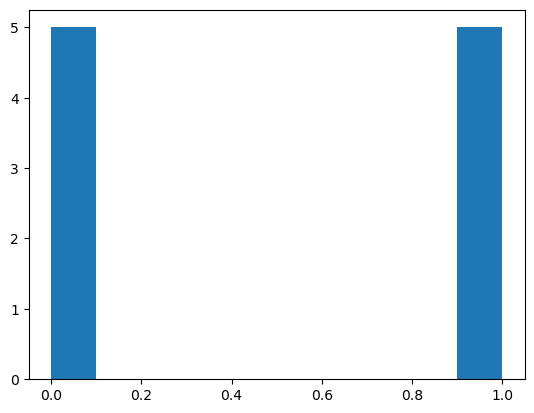

In [3]:
import matplotlib.pyplot as plt
plt.hist(labels_d1, density=True)

(array([4.35398783e-03, 3.22147651e-03, 7.46683315e-04, 2.93429062e-04,
        2.61588887e-04, 1.72311534e-04, 1.21117528e-04, 8.55314500e-05,
        3.80833463e-05, 8.11612299e-06]),
 array([   0. ,  107.5,  215. ,  322.5,  430. ,  537.5,  645. ,  752.5,
         860. ,  967.5, 1075. ]),
 <BarContainer object of 10 artists>)

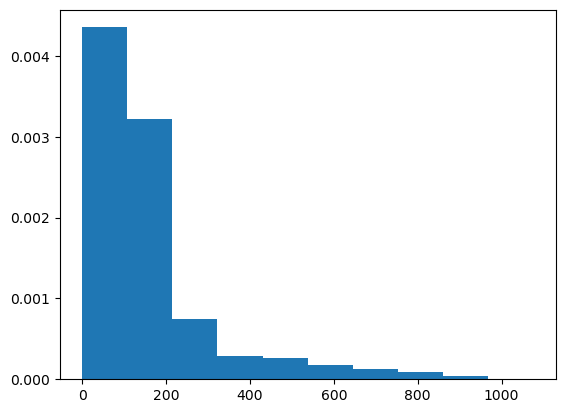

In [5]:
plt.hist([len(feature) for feature in features_d2], density=True)

(array([1.65660500e-02, 1.55533918e-02, 4.49637564e-03, 2.21356702e-03,
        1.82408309e-03, 9.86692632e-04, 3.50535540e-04, 1.53629774e-04,
        4.32759926e-05, 6.49139890e-06]),
 array([  1. ,  24.7,  48.4,  72.1,  95.8, 119.5, 143.2, 166.9, 190.6,
        214.3, 238. ]),
 <BarContainer object of 10 artists>)

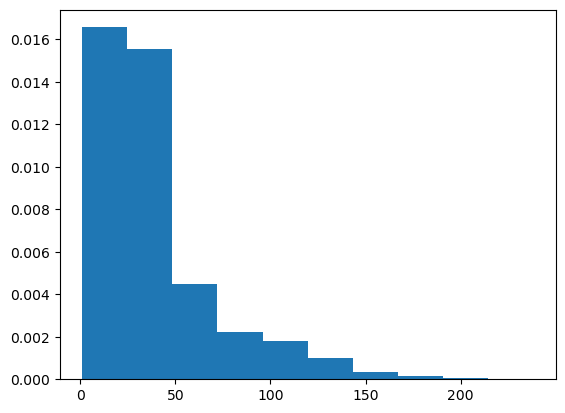

In [6]:
plt.hist([len(feature) for feature in features_d1], density=True)

In [7]:
features = features_d1 + features_d2
labels = labels_d1 + labels_d2

In [10]:
labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


(array([6.54069767, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 3.45930233]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

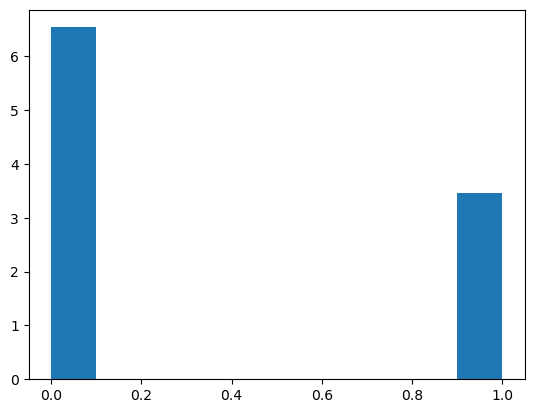

In [8]:
plt.hist(labels, density=True)

In [26]:
def dummy_fun(doc):
    return doc

tfidf = TfidfVectorizer(
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)  

# Fit and transform the data to text
features_tfidf = tfidf.fit_transform(features)


In [27]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_tfidf, labels, test_size=0.2, random_state=42)

# Create a Multinomial Naive Bayes classifier
naive_bayes = MultinomialNB()

# Train the classifier
naive_bayes.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = naive_bayes.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7670058139534883


In [28]:
from sklearn.linear_model import SGDClassifier

# Initialize and fit the model
clf = SGDClassifier(loss="hinge")  # 'hinge' loss gives a linear SVM
clf.fit(X_train, y_train)

# Evaluate the model
score = clf.score(X_test, y_test)

In [29]:
score

0.8853197674418605

In [30]:
clf_kaggle = SGDClassifier(loss="hinge")  # 'hinge' loss gives a linear SVM
clf_kaggle.fit(features_tfidf, labels)

SGDClassifier()

In [35]:
test_ids = []
test_texts = []
# Open file for reading
with open('test_set.json', 'r') as f:
    for line in f:
        # Parse the JSON line into a Python dictionary
        obj = json.loads(line)
        test_ids.append(obj['id'])
        test_texts.append(obj['text'])

In [36]:
test_texts = tfidf.transform(test_texts)
predict_classes = clf_kaggle.predict(test_texts)

In [39]:
import pandas as pd
output_df = pd.DataFrame({"id":test_ids, "class": predict_classes})

In [42]:
output_df.to_csv("output.csv", index=False)